# 25절: 난수발생과 카운팅

## NumPy를 사용한 난수 발생과 카운팅


In [33]:
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

## 시드 설정하기

시드(seed) : 같은 알고리즘을 여러번 실행하더라도 다른 숫자가 나오도록 시작 숫자는 현재 시간 등을 사용해서 매번 바꿔준다. 시작 숫자

In [3]:
np.random.seed(0)
np.random.rand(5)

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ])

## 기존의 데이터의 순서 바꾸기

In [7]:
x = np.arange(10)
np.random.shuffle(x)
x

array([3, 1, 8, 7, 9, 0, 6, 4, 2, 5])

## 기존의 데이터에서 샘플링하기

choice 명령

* numpy.random.choice(a, size=None, replace=True, p=None)
    - a : 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
    - size : 정수. 샘플 숫자
    - replace : 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
    - p : 배열. 각 데이터가 선택될 수 있는 확률

In [8]:
np.random.choice(5, 5, replace=False) # shuffle 명령과 같음 

array([4, 2, 3, 1, 0])

In [9]:
np.random.choice(5, 3, replace=False)  # 3개만 선택

array([2, 3, 4])

In [10]:
np.random.choice(5, 10) # 반복해서 10개 선택

array([0, 3, 0, 2, 3, 0, 1, 3, 3, 3])

In [11]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])  # 선택 확률을 다르게 해서 10개 선택

array([2, 3, 2, 3, 3, 3, 2, 3, 3, 3], dtype=int64)

## 난수 생성
random 서브패키지 난수 생성

- rand: 0부터 1사이의 균일 분포
- randn: 가우시안 표준 정규 분포
- randint: 균일 분포의 정수 난수

In [13]:
np.random.rand(10)

array([ 0.0187898 ,  0.6176355 ,  0.61209572,  0.616934  ,  0.94374808,
        0.6818203 ,  0.3595079 ,  0.43703195,  0.6976312 ,  0.06022547])

In [14]:
np.random.rand(3, 5)

array([[ 0.66676672,  0.67063787,  0.21038256,  0.1289263 ,  0.31542835],
       [ 0.36371077,  0.57019677,  0.43860151,  0.98837384,  0.10204481],
       [ 0.20887676,  0.16130952,  0.65310833,  0.2532916 ,  0.46631077]])

기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성

In [15]:
np.random.randn(10)

array([-0.63972264, -0.4794198 ,  0.3113635 , -0.77602047, -0.30736481,
       -0.36652394,  1.11971196, -0.45792242,  0.4253934 , -0.02797118])

* randint <br>
numpy.random.randint(low, high=None, size=None)

high를 입력하지 않으면 0과 low사이의 숫자를, high를 입력하면 low와 high는 사이의 숫자를 출력

In [16]:
np.random.randint(10, size=10)

array([7, 5, 9, 0, 2, 7, 2, 9, 2, 3])

In [17]:
np.random.randint(10, 20, size=10)

array([13, 12, 13, 14, 11, 12, 19, 11, 14, 16])

In [18]:
np.random.randint(10, 20, size=(3,5))

array([[18, 12, 13, 10, 10],
       [16, 10, 16, 13, 13],
       [18, 18, 18, 12, 13]])

## 정수 데이터 카운팅

난수가 실수값이면 히스토그램 <br>
난수가 정수값이면 unique 명령이나 bincount 명령으로 데이터 값을 분석

unique : 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력

return_counts 인수를 True 로 설정 : 각 값을 가진 데이터 갯수 출력

In [20]:
np.unique([11,11,2,2,34,34])

array([ 2, 11, 34])

In [25]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)
index
count

array(['a', 'b', 'c'],
      dtype='<U1')

array([2, 2, 1], dtype=int64)

unique 명령은 데이터에 존재하는 값에 대해서만 갯수를 세므로 데이터 값이 나올 수 있음에도 불구하고 데이터가 하나도 없는 경우에는 정보를 주지 않는다.

bincount에 minlength 인수를 설정

0 부터 minlength - 1 까지의 숫자에 대해 각각 카운트<br>
데이터가 없을 경우에는 카운트 값이 0 

In [26]:
np.bincount([1, 1, 2, 2, 2, 3], minlength=6)

array([0, 2, 3, 1, 0, 0], dtype=int64)

# 26절: SciPy의 확률분석기능

## SciPy를 이용한 확률 분포 분석

### 확률 분포 객체


| 종류 | 이름                | 확률 분포                 |
|------|---------------------|---------------------------|
| 이산 | bernoulli           | 베르누이 분포             |
| 이산 | binom               | 이항 분포                 |
| 연속 | uniform             | 균일 분포                 |
| 연속 | norm                | 가우시안 정규 분포        |
| 연속 | beta                | 베타 분포                 |
| 연속 | gamma               | 감마 분포                 |
| 연속 | t                   | 스튜던트 t 분포           |
| 연속 | chi2                | 카이 제곱 분포            |
| 연속 | f                   | F 분포                    |
| 연속 | dirichlet           | 디리클리 분포             |
| 연속 | multivariate_normal | 다변수 가우시안 정규 분포 |




In [28]:
import scipy.stats

rv = scipy.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

### 모수 지정
분포의 모수(parameter)를 인수로 지정

확률 분포마다 지정해 주어야 할 모수가 다름

- loc	: 일반적으로 분포의 기댓값
- scale	: 일반적으로 분포의 표준편차
- size	: 샘플 생성시 생성될 샘플의 크기
- random_state	: 샘플 생성시 사용되는 시드(seed)값

In [31]:
rv = sp.stats.norm(loc=1, scale=2)
rv

## 확률 분포 메서드

- pdf	: 확률 밀도 함수 (probability density function)
- pmf	: 확률 질량 함수 (probability mass function)
- cdf	: 누적 분포 함수 (cumulative distribution function)
- rvs	: 랜덤 샘플 생성 (random variable sampling)
- stats	: 기술 통계 함수 (descriptive statistics)
- fit	: 모수 추정 (parameter estimation)

### 확률 밀도 함수

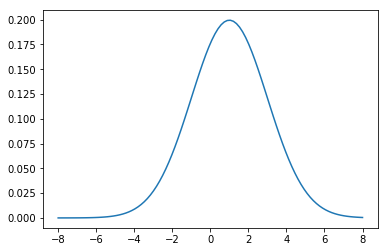

In [34]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

### 누적 분포 함수

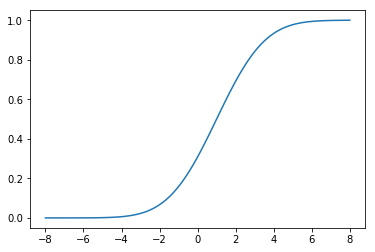

In [35]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.show()

### 랜덤 샘플 생성

In [36]:
rv.rvs(size=(3,5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

(-8, 8)

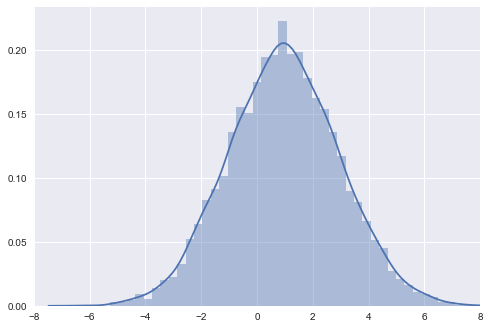

In [38]:
 import seaborn as sns 

sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-8, 8)
plt.show()

# 분포의 대표값

평균, 기댓값, 중간값

## 샘플 평균

샘플 :  이미 가지고 있는 자료 값의 집합이 어떤 확률 모형 또는 모집합으로 부터 생성된 것이

샘플링 할 때마다 샘플 평균이 예측할 수 없는 값이 나오기 때문에 샘플 평균  X 도 하나의 확률 변수라고 할 수 있다


## 확률 분포의 기댓값

일반적으로 <br>
평균 = 확률 변수의 기댓값(expectation)

## 기댓값의 성질

랜덤변수가 아닌 고정된 값 c 에 대해 $\operatorname{E}[c] = c$ 
<br> 선형성

## 독립인 두 확률 변수의 기댓값

두 확률 변수가 독립이면 

$\text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] = 0$

## 기댓값과 샘플 평균의 관계

샘플 평균의 기댓값

이 기댓값이 원래의 확률 변수의 기댓값과 일치함을 수학적으로 증명<br>
$\begin{eqnarray}
\operatorname{E}[\bar{X}] 
&=& \operatorname{E}\left[\dfrac{1}{N}\sum_{1}^{N}X_i \right]  \\
&=& \dfrac{1}{N}\sum_{1}^{N}\operatorname{E}[X_i]  \\
&=& \dfrac{1}{N}\sum_{1}^{N}\operatorname{E}[X]  \\
&=& \dfrac{1}{N} N \operatorname{E}[X] \\ 
&=& \operatorname{E}[X]  \\
\end{eqnarray}$

## 중앙값

전체 자료를 크기별로 정렬하였을 때 가장 중앙에 위치하게 되는 값

전체 샘플의 갯수 N 
    - N 이 홀수 : 중간값은 (n+1)/2 번째 샘플 값
    - N 이 짝수 : 중간값은 n/2 샘플의 값과 n/2+1 번쨰 샘플 값의 평균
 
## 최빈값
 가장 빈번하게 나올 수 있는 값
 
## 기댓값, 중앙값, 최빈값의 비교

확률 밀도 함수가 대칭인 경우에는 기댓값, 중앙값, 최빈값이 모두 같다.

<img src = 'https://datascienceschool.net/upfiles/dd06ed356a03475cbe9cc14909be96d1.jpeg'/>



## Python 을 사용한 계산
* mean()
* nanmean()
* median()
* argmax()
* histogram()

In [39]:
np.random.seed(0)
x = np.random.normal(size=1000)

np.mean(x), np.median(x)

(-0.045256707490195384, -0.058028034799627745)

In [40]:
ns, bins = np.histogram(x, bins=np.linspace(-10,10,20))
M = np.argmax(ns)
bins[M], bins[M+1]

(-0.52631578947368496, 0.52631578947368318)

# 분산과 표준편차

분포의 모양에서 위치를 대표하는 값 : 평균, 기댓값<br>
분포의 폭을 대표하는 값 : 분산 
(분산에 대한 양의 제곱근:표준편차)

## 샘플 분산

편향 오차를 갖는 편향 샘플 분산 

$s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2$

비편향 샘플분산 

$s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2$ 


## 확률 분포의 분산

확률 분포 확률 밀도 함수f(x) 로 분포 전체의 모양을 정확하게 정의  

$\sigma^2 = \text{Var}[X] = \text{E}[(X - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 f(x)dx$

이산 확률 변수 확률 질량 함수  P(x) 를 사용하여 분산

$\sigma^2 = \sum (x - \mu)^2 P(x)$

## 분산의 성질
 
- 0 또는 양수값
- 랜덤 변수가 아닌 고정된 값 c에 대해 
$\text{Var}[c] = 0$ , 
$\text{Var}[cX] = c^2 \text{Var}[X]$

## 독립인 두 확률 변수의 분산

$\text{Var}\left[ X + Y \right] =  \text{Var}\left[ X \right] + \text{Var}\left[ Y \right]$

다음식이 성립됨 

$\text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] = 0$ 
->
$\text{Var}\left[ X + Y \right] =  \text{E}\left[ (X -\mu_X)^2 \right] + \text{E}\left[ (Y - \mu_Y)^2 \right]$

## 샘플 평균의 분산

## Python을 사용한 계산

- var()
- std()
- nanvar()
- nanstd()


(array([   9.,   20.,   70.,  146.,  217.,  239.,  160.,   86.,   38.,   15.]),
 array([-6.09228611, -4.93118648, -3.77008684, -2.60898721, -1.44788757,
        -0.28678794,  0.87431169,  2.03541133,  3.19651096,  4.35761059,
         5.51871023]),
 <a list of 10 Patch objects>)

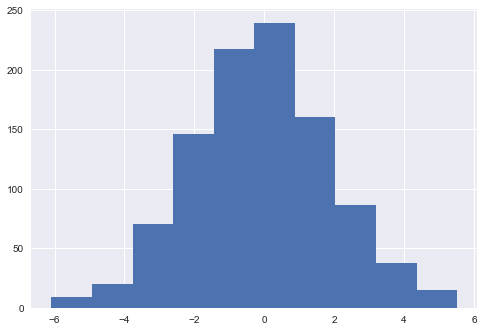

In [47]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # mean=0, standard deviation=2
plt.hist(x)
plt.show()

In [45]:
np.var(x)

np.var(x, ddof=1)  # unbiased variance

3.8969378252486169

3.9008386639125292